In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

import nc_time_axis
import cftime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from cmocean import cm as cmo

from GG_mthesis import utils as utils
import gsw


%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\gian_\\repos\\mthesis_gianlucca')
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

In [3]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [4]:
#define the path
path = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_transect.nc'

#open the dataset with the defined path
ds = xr.open_dataset(path) 

In [5]:
ds

<xarray.Dataset>
Dimensions:           (time: 2726)
Coordinates:
    lat               (time) float64 ...
    lon               (time) float64 ...
    depth             (time) float32 ...
  * time              (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824
Data variables:
    attenuation       (time) float32 ...
    conductivity_tsg  (time) float32 ...
    chl-a             (time) float32 ...
    sal_tsg_cal       (time) float32 ...
    sal_tsg_nocal     (time) float32 ...
    temp_hull_1       (time) float32 ...
    temp_hull_2       (time) float32 ...
    temp_cond_tsg     (time) float32 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [6]:
gsw.conversions.p_from_z(-ds.depth, ds.lat)

<xarray.DataArray (time: 2726)>
array([6.55777705, 6.55777843, 6.55778003, ..., 6.56258064, 6.56258248,
       6.56258432])
Coordinates:
    lat      (time) float64 -52.5 -52.5 -52.51 -52.51 ... -61.19 -61.19 -61.2
    lon      (time) float64 -58.17 -58.17 -58.17 -58.17 ... -57.09 -57.09 -57.09
    depth    (time) float32 6.5 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5 6.5 6.5
  * time     (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824

In [7]:
press = gsw.conversions.p_from_z(-ds.depth, ds.lat)
ds['SA'] = gsw.conversions.SP_from_SA(ds.sal_tsg_cal,gsw.conversions.p_from_z(-ds.depth, ds.lat),ds.lon,ds.lat )
ds['SA'].attrs = {'long_name': 'Absolute Salinity calculated from Practical Salinity',
 'standard_name': 'SA',
 'units': 'g/kg',
 'axis': 'time',
 'valid_min': 0.0,
 'valid_max': 2500000.0,
 'description': 'Absolute salinity calculated from practical salinity using GSW'}

In [8]:
ds

<xarray.Dataset>
Dimensions:           (time: 2726)
Coordinates:
    lat               (time) float64 -52.5 -52.5 -52.51 ... -61.19 -61.19 -61.2
    lon               (time) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth             (time) float32 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5 6.5
  * time              (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824
Data variables:
    attenuation       (time) float32 0.3768252 0.35738423 ... 0.37621197
    conductivity_tsg  (time) float32 3.44636 3.446025 ... 2.85068 2.85017
    chl-a             (time) float32 3.82668 3.51624 3.44292 ... 1.41336 1.4157
    sal_tsg_cal       (time) float32 33.695 33.69425 33.69085 ... 33.934 33.9305
    sal_tsg_nocal     (time) float32 33.6981 33.69735 ... 33.9371 33.9336
    temp_hull_1       (time) float32 6.70895 6.69845 ... -0.55975 -0.5741
    temp_hull_2       (time) float32 6.72655 6.7223 6.72065 ... -0.5524 -0.5659
    temp_cond_tsg     (time) float32 7.4051 7.40175 7.41585 ... 0.3236 0.3199
    SA                (time) float64 33.54 33.54 33.53 ... 33.77 33.77 33.77
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [9]:
SP_from_hull = gsw.conversions.SP_from_C(ds.conductivity_tsg*10,ds.temp_hull_1,press)
SP_from_tsg = gsw.conversions.SP_from_C(ds.conductivity_tsg*10,ds.temp_cond_tsg,press)

In [10]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

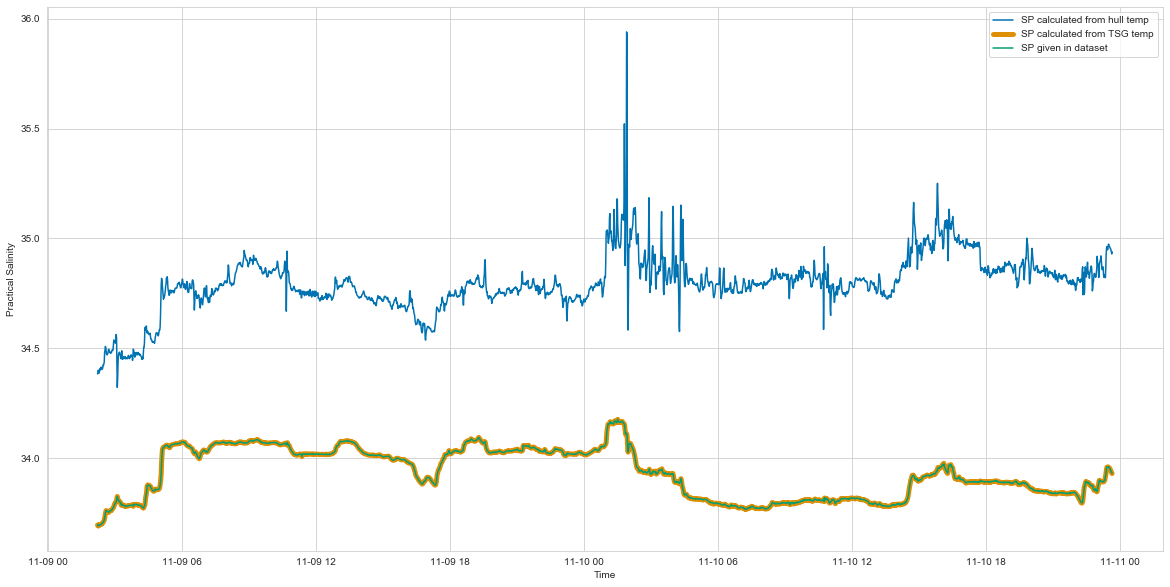

In [11]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

sns.lineplot(x=ds.time, y=SP_from_hull, ax=ax0, label='SP calculated from hull temp')
sns.lineplot(x=ds.time, y=SP_from_tsg, ax=ax0, label='SP calculated from TSG temp', linewidth=5)
sns.lineplot(x=ds.time, y=ds.sal_tsg_cal, ax=ax0, label='SP given in dataset')

ax0.set(xlabel='Time', ylabel='Practical Salinity')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\SP-temp_compare.png', bbox_inches='tight', format='png')

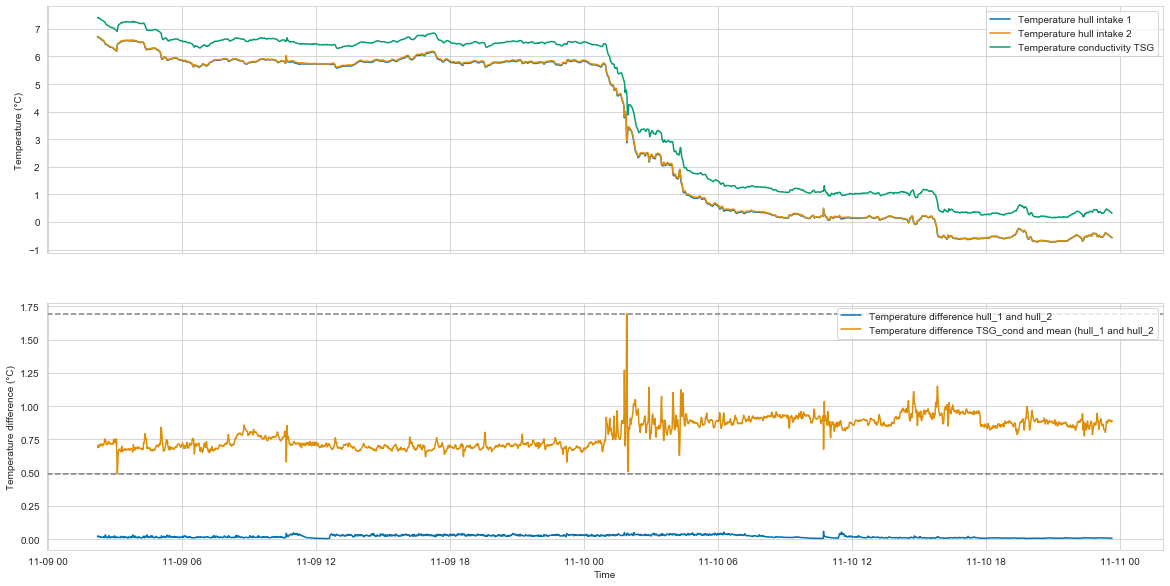

In [12]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20,10))

sns.lineplot(x=ds.time, y=ds.temp_hull_1, ax=ax0, label='Temperature hull intake 1')
sns.lineplot(x=ds.time, y=ds.temp_hull_2, ax=ax0, label='Temperature hull intake 2')
sns.lineplot(x=ds.time, y=ds.temp_cond_tsg, ax=ax0, label='Temperature conductivity TSG')

temp_diff = ds.temp_cond_tsg-((ds.temp_hull_1+ds.temp_hull_2)/2)

sns.lineplot(x=ds.time, y=(ds.temp_hull_2-ds.temp_hull_1), ax=ax1, label='Temperature difference hull_1 and hull_2')
sns.lineplot(x=ds.time, y=temp_diff, ax=ax1, label='Temperature difference TSG_cond and mean (hull_1 and hull_2')
ax1.axhline(y=np.max(temp_diff), label=str(('Max = ') + str((np.max(temp_diff),2)) + str(' °C')), color='grey', linestyle='--')
ax1.axhline(y=np.min(temp_diff), label=str(('Min = ') + str((np.min(temp_diff),2)) + str(' °C')), color='grey', linestyle='--')

ax0.set(ylabel='Temperature (°C)')
ax1.set(xlabel='Time', ylabel='Temperature difference (°C)')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\temp_compare.png', bbox_inches='tight', format='png')

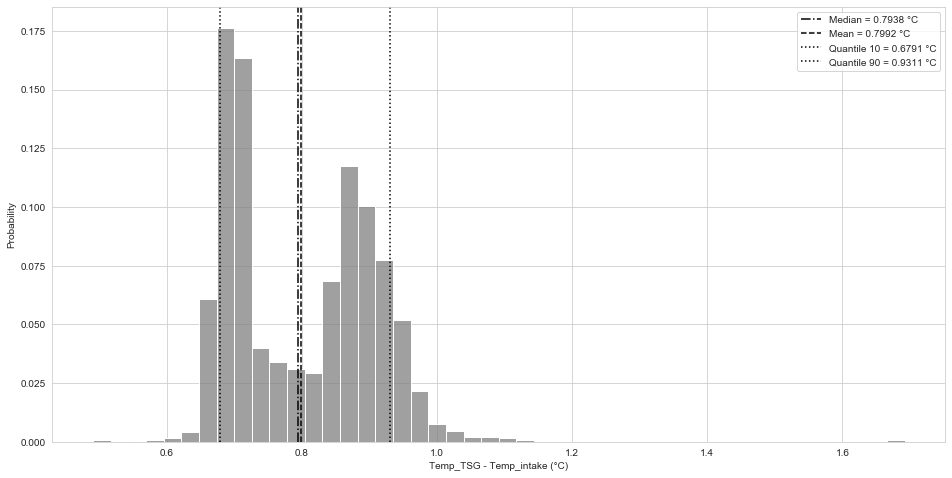

In [13]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16,8))

sns.histplot(temp_diff, element='bars', stat='probability', color='grey', ax=ax0)

for axis in [ax0]:
    axis.axvline(x=np.median(temp_diff), label=str(('Median = ') + str(np.round(np.median(temp_diff),decimals=4)) 
    + str(' °C')), color='black', linestyle='-.')
    axis.axvline(x=np.mean(temp_diff), label=str(('Mean = ') + str(np.round(np.array(np.mean(temp_diff)),decimals=4))
    + str(' °C')), color='black', linestyle='--')
    axis.axvline(x=np.quantile(temp_diff, .10), label=str(('Quantile 10 = ') + str(np.round(np.quantile(temp_diff, .10),
    decimals=4)) + str(' °C')), color='black', linestyle=':',)
    axis.axvline(x=np.quantile(temp_diff, .90), label=str(('Quantile 90 = ') + str(np.round(np.quantile(temp_diff, .90),
    decimals=4)) + str(' °C')), color='black', linestyle=':')
    axis.legend(loc='upper right')
ax0.set(xlabel='Temp_TSG - Temp_intake (°C)')

plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\temp_diff_dist.png', bbox_inches='tight', format='png')

In [14]:
np.ptp(np.array(ds.temp_cond_tsg-((ds.temp_hull_1+ds.temp_hull_2)/2)))

1.2011747

(24/05/2021) After talking with Seb, we decided to take the TSG values at the moment. But I am going to check the documentation and papers again for details on processing.

In [15]:
#let´s have a look at the conservative temperature using different temperature intakes.
ds['CT_cond'] = gsw.CT_from_t(ds.SA,ds.temp_cond_tsg, press)
ds['CT_hull'] = gsw.CT_from_t(ds.SA, ds.temp_hull_1, press)

In [16]:
ds

<xarray.Dataset>
Dimensions:           (time: 2726)
Coordinates:
    lat               (time) float64 -52.5 -52.5 -52.51 ... -61.19 -61.19 -61.2
    lon               (time) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth             (time) float32 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5 6.5
  * time              (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824
Data variables:
    attenuation       (time) float32 0.3768252 0.35738423 ... 0.37621197
    conductivity_tsg  (time) float32 3.44636 3.446025 ... 2.85068 2.85017
    chl-a             (time) float32 3.82668 3.51624 3.44292 ... 1.41336 1.4157
    sal_tsg_cal       (time) float32 33.695 33.69425 33.69085 ... 33.934 33.9305
    sal_tsg_nocal     (time) float32 33.6981 33.69735 ... 33.9371 33.9336
    temp_hull_1       (time) float32 6.70895 6.69845 ... -0.55975 -0.5741
    temp_hull_2       (time) float32 6.72655 6.7223 6.72065 ... -0.5524 -0.5659
    temp_cond_tsg     (time) float32 7.4051 7.40175 7.41585 ... 0.3236 0.3199
    SA                (time) float64 33.54 33.54 33.53 ... 33.77 33.77 33.77
    CT_cond           (time) float64 7.42 7.417 7.431 ... 0.3382 0.3295 0.3258
    CT_hull           (time) float64 6.723 6.712 6.712 ... -0.5545 -0.5688
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

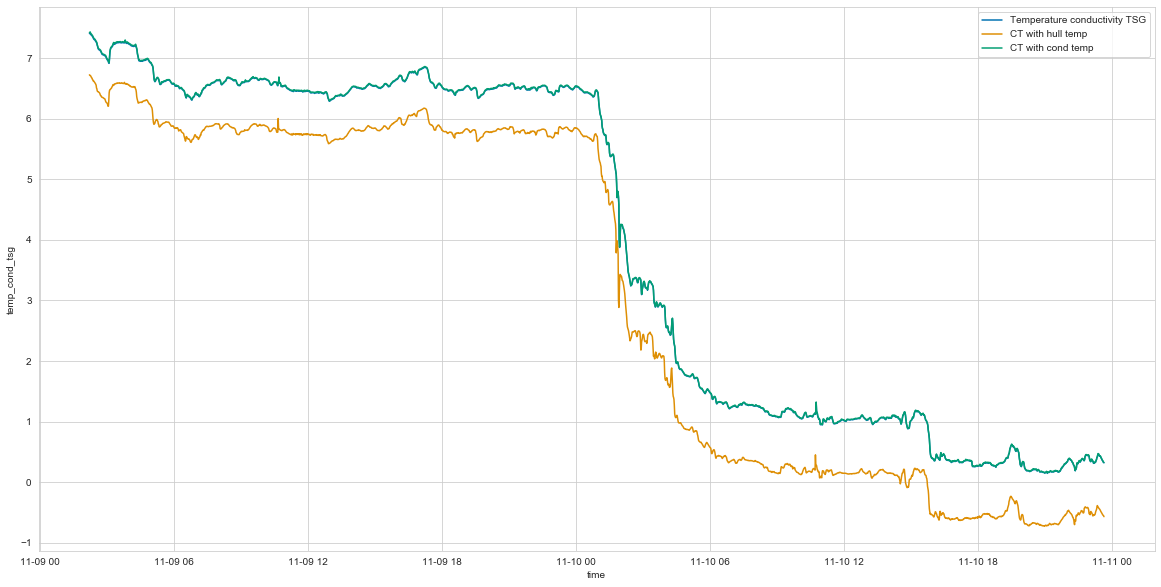

In [17]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

#sns.lineplot(x=ds.time, y=ds.temp_hull_1, ax=ax0, label='Temperature hull intake 1')
#sns.lineplot(x=ds.time, y=ds.temp_hull_2, ax=ax0, label='Temperature hull intake 2')
sns.lineplot(x=ds.time, y=ds.temp_cond_tsg, ax=ax0, label='Temperature conductivity TSG')
sns.lineplot(x=ds.time, y=ds.CT_hull, ax=ax0, label='CT with hull temp')
sns.lineplot(x=ds.time, y=ds.CT_cond, ax=ax0, label='CT with cond temp')

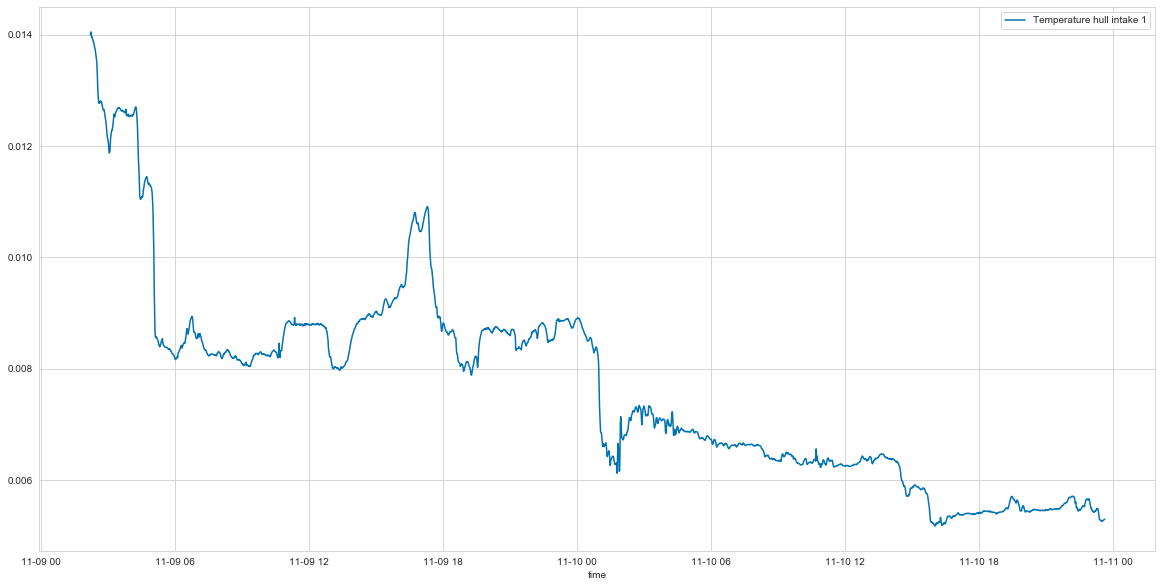

In [18]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

sns.lineplot(x=ds.time, y=ds.CT_hull-ds.temp_hull_1, ax=ax0, label='Temperature hull intake 1')

In [19]:
pt = gsw.pt_from_t(ds.SA, ds.temp_hull_1, press, 0)

In [20]:
ds

<xarray.Dataset>
Dimensions:           (time: 2726)
Coordinates:
    lat               (time) float64 -52.5 -52.5 -52.51 ... -61.19 -61.19 -61.2
    lon               (time) float64 -58.17 -58.17 -58.17 ... -57.09 -57.09
    depth             (time) float32 6.5 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5 6.5
  * time              (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824
Data variables:
    attenuation       (time) float32 0.3768252 0.35738423 ... 0.37621197
    conductivity_tsg  (time) float32 3.44636 3.446025 ... 2.85068 2.85017
    chl-a             (time) float32 3.82668 3.51624 3.44292 ... 1.41336 1.4157
    sal_tsg_cal       (time) float32 33.695 33.69425 33.69085 ... 33.934 33.9305
    sal_tsg_nocal     (time) float32 33.6981 33.69735 ... 33.9371 33.9336
    temp_hull_1       (time) float32 6.70895 6.69845 ... -0.55975 -0.5741
    temp_hull_2       (time) float32 6.72655 6.7223 6.72065 ... -0.5524 -0.5659
    temp_cond_tsg     (time) float32 7.4051 7.40175 7.41585 ... 0.3236 0.3199
    SA                (time) float64 33.54 33.54 33.53 ... 33.77 33.77 33.77
    CT_cond           (time) float64 7.42 7.417 7.431 ... 0.3382 0.3295 0.3258
    CT_hull           (time) float64 6.723 6.712 6.712 ... -0.5545 -0.5688
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

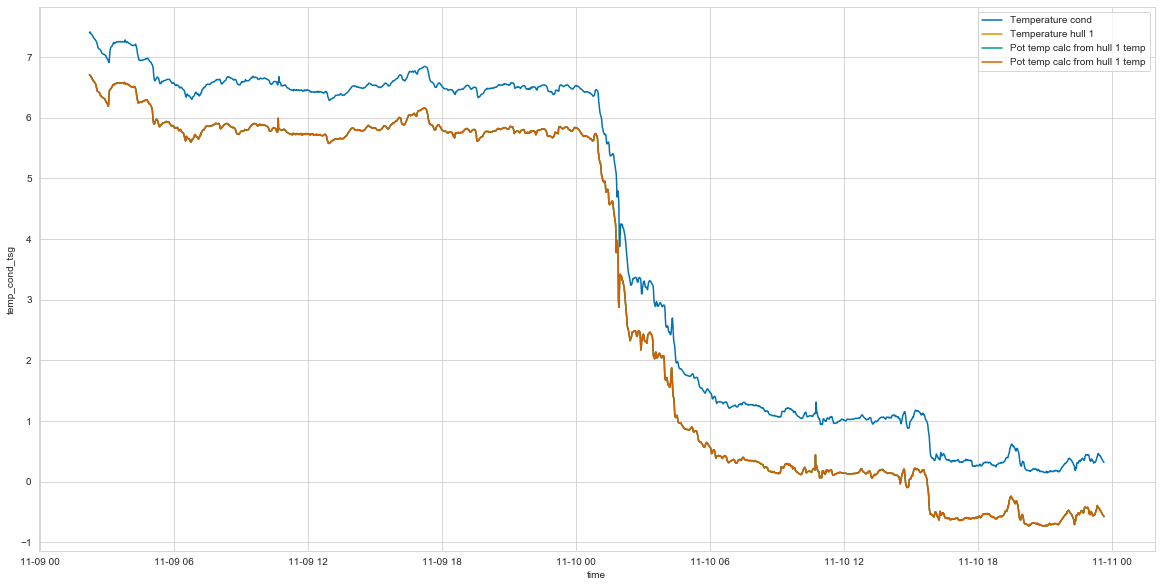

In [24]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

sns.lineplot(x=ds.time, y=ds.temp_cond_tsg, ax=ax0, label='Temperature cond')
sns.lineplot(x=ds.time, y=ds.temp_hull_1, ax=ax0, label='Temperature hull 1')
sns.lineplot(x=ds.time, y=pt, label='Pot temp calc from hull 1 temp')

In [ ]:
gsw.pt_from_t()

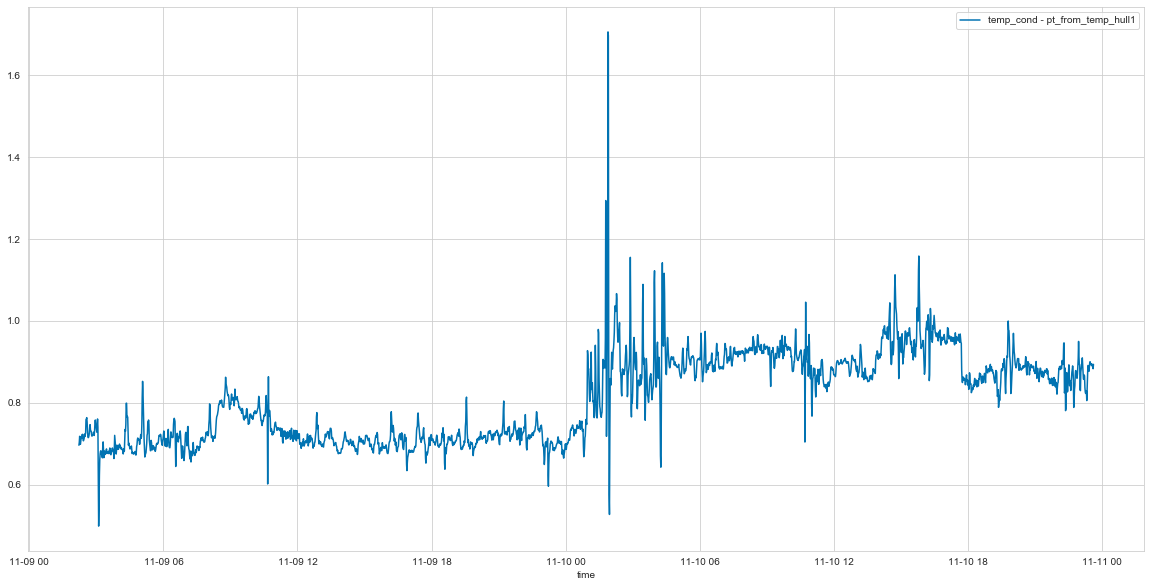

In [26]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

sns.lineplot(x=ds.time, y=ds.temp_cond_tsg - gsw.pt_from_t(ds.SA,ds.temp_hull_1, 6.5, 0), ax=ax0, label='temp_cond - pt_from_temp_hull1')
